In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
data=pd.read_csv("/Users/chohan/Desktop/ML_DL_ Hackathon/MachineHack Machine Learning Challenge Predicting House Prices In Bengaluru/Data/train.csv")

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
data.shape

(13320, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [12]:
data["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [13]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
data["society"].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [15]:
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
data["bath"].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [17]:
data["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [18]:
data["balcony"].unique()

array([ 1.,  3., nan,  2.,  0.])

In [19]:
#Check Null Values of Bath
data["bath"].isna().sum()

73

In [20]:
#Mean of a Bath value
mean_bath=data["bath"].mean().round()

In [21]:
#Replace all Null value to mean_bath
data["bath"]=data["bath"].replace(np.nan,mean_bath).astype(float)

In [22]:
#After changing check the nan value
data["bath"].isna().sum()

0

In [23]:
#Check Null Values of Balcony
data["balcony"].isna().sum()

609

In [24]:
#Replace and Mean of Balcony
mean_balcony=data["balcony"].mean().round()
data["balcony"]=data["balcony"].replace(np.nan,mean_balcony).astype(float)

In [25]:
#After changing check the nan value
data["balcony"].isna().sum()

0

In [26]:
import re
total_sqrft=[]
for i in range(len(data)):
    a=data["total_sqft"][i]
    total_sqrft.append(a)

In [27]:
total_sqft1=[]
for i in range(len(total_sqrft)):
    result=re.sub("\d - \d","",total_sqrft[i])
    total_sqft1.append(result)

In [28]:
total_sqft2=[]
for i in range(0,len(total_sqft1)):
    result=re.sub("[Sq. Meter,Perch, Yards,A,G,C,n,u,o]","",total_sqft1[i])
    total_sqft2.append(result)

In [29]:
data["total_sqft"]=total_sqft2

In [30]:
def total_sqftreplace():
    total_sqrft=[]
    for i in range(len(data)):
        a=data["total_sqft"][i]
        total_sqrft.append(a)
    total_sqft1=[]
    for i in range(len(total_sqrft)):
        result=re.sub("\d - \d","",total_sqrft[i])
        total_sqft1.append(result)
    total_sqft2=[]
    for i in range(0,len(total_sqft1)):
        result=re.sub("[Sq. Meter,Perch, Yards,A,G,C,n,u,o]","",total_sqft1[i])
        total_sqft2.append(result)
    data["total_sqft"]=total_sqft2
    data["total_sqft"]=data["total_sqft"].replace("",data["total_sqft"][0])
    new=[]
    for i in range(0,len(data["total_sqft"])):
        a=eval(data["total_sqft"][i])
        new.append(a)
        print(a)
    data["total_sqft"]=new
    data["total_sqft"]=data["total_sqft"].astype(float)
    return data["total_sqft"]

In [31]:
data["total_sqft"].head()

0    1056
1    2600
2    1440
3    1521
4    1200
Name: total_sqft, dtype: object

In [32]:
data.drop(columns=['availability', 'location', 'size', 'society'],inplace=True)

In [33]:
data.head()

,area_type,total_sqft,bath,balcony,price
0,Super built-up Area,1056,2.0,1.0,39.07
1,Plot Area,2600,5.0,3.0,120.00
2,Built-up Area,1440,2.0,3.0,62.00
3,Super built-up Area,1521,3.0,1.0,95.00
4,Super built-up Area,1200,2.0,1.0,51.00


In [34]:
data.dtypes

area_type      object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [35]:
data["total_sqft"].replace("",data["total_sqft"][0])

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [36]:
len(total_sqft2)

13320

In [37]:
new=[]
for i in range(0,len(data["total_sqft"])):
    a=eval(data["total_sqft"][i])
    new.append(a)
    print(a)

1056
2600
1440
1521
1200
1170
2732
3300
1310
1020
1800
2785
1000
1100
2250
1175
1180
1540
2770
1100
600
1755
2800
1767
510
1250
660
1610
1151
1025
210850
1075
1760
1693
1925
700
1070
1724
1290
1143
1296
1254
600
660
133074
600
970
1459
800
869
1270
1670
2010
1185
1600
1200
301410
1500
1407
840
4395
845
5700
1160
3000
1100
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
295450
1326
1325
1499
3000
1665
708
1060
710
1000
1000
1450
1200
1296
1540
2894
1330
1200
1200
2502
650
2400
1007
1200
966
1630
1640
782
1260
1800
1413
1116
1530
3700
2497
1540
1436
1100
276
1427
2061
306156
2650
1282
1050
1600
945
1500
950
1870
1600
880
1200
1535
950
1360
104105
1280
1260
5000
3050
156305
1000
1167
4000
1828
890
1612
1034
1710
957
1250
2795
1125
1020
1200
1735
2050
3750
1350
1063
1904
4200
2000
114340
1425
1500
1060
1470
1300
450
1152
1350
1550
1500
600
400
705
770
1242
1700
2144
1704
1070
1846
1340
1025
101540
1200
2250
1550
1200
1800
1200
1327
1186
1783
1400
980
1285
912
1225


955
1360
1150
3450
1115
920
1030
1564
1045
1200
1277
247913
1846
1100
1690
1200
3042
1640
1068
1135
1925
1615
650
1200
1150
930
1410
600
2000
1354
1050
600
1320
1600
3500
1000
1130
1238
2204
1200
1364
900
1745
1200
1020
1650
1550
1440
1329
916
688
1358
1331
686
1050
2106
1718
1530
1206
1075
1200
1936
217265
1100
1260
990
800
1117
1685
740
1080
1500
1800
1700
850
1891
1400
1172
1400
896
1180
2460
850
530
1550
1699
2025
500
500
1146
2475
1455
800
765
1521
1600
3155
2900
1765
1980
1900
1265
1034
1012
1070
3555
1270
585
2045
1490
6150
883
671
1156
2017
3122
1635
4400
1296
2400
1139
1230
58191
1245
1158
3951
550
360
1350
1670
1600
1307
1050
1703
1210
1025
1140
1343
1560
925
1420
1415
1210
1852
1250
1100
1150
1100
1350
1546
1424
1398
1650
1200
1476
500
1322
432
1100
4750
1285
1150
1430
1350
1350
1185
1760
2400
900
1297
1840
950
1200
950
125305
1571
1031
1485
1109
2200
950
1200
1161
2350
1003
1350
1080
1255
1250
1700
1200
824
1875
1320
9600
1330
1220
1111
1197
2519
1340
1450
1837
1200
1238
14

1280
2155
3200
4260
1255
1388
905
1176
1390
2400
1160
2800
1200
1583
1252
1170
1350
1075
972
1486
555
4830
850
1282
2790
2383
1103
1577
1465
1600
1090
1721
1100
1450
1071
2266
2065
1800
1150
1200
1123
1884
930
1145
1328
950
1250
1115
1318
3300
1280
1230
1420
2111
1100
1750
2550
700
1050
1235
1200
900
1146
1200
2400
1200
615
1070
1538
1355
3080
1800
1400
1123
1200
787
1082
1096
1200
1140
1130
550
1058
1269
946
3400
2689
1976
1820
1329
1350
1250
1205
800
1339
938
450
1100
600
1060
1125
810
1060
1749
1200
1100
6600
720
6613
1925
502
3339
1475
1550
966
1350
1300
4400
1559
1246
2790
1410
1300
1339
900
1104
900
1550
670
1483
1540
1200
1255
600
1036
1460
1230
1340
1600
2162
919
1070
1733
1221
1041
2550
1400
600
710
1500
3122
2061
2400
1255
2425
1031
1210
950
1376
1161
1303
1418
1200
1825
1015
1150
1010
1508
1275
1460
946
1110
1832
1088
1564
1030
660
1700
1100
1205
1950
1080
2800
999
900
1300
1265
1200
1974
1180
1350
1560
2800
1085
1300
1600
1127
795
1850
1020
1475
1200
1345
849
1706
2100
1250

1007
6185
1830
1077
672
1280
865
1000
1285
662
2297
3750
1850
1754
1200
2200
1567
1695
360
1150
1690
2350
1057
1320
2119
1125
2254
645
1050
1040
1700
1760
1138
984
1140
3596
1365
560
1404
1540
1050
360
1550
1653
1194
1471
700
812
1504
1450
957
460
900
1050
1820
1033
800
520
1165
1280
1950
600
1550
1392
1221
1000
1300
1065
1209
375
7800
1929
1255
1035
1200
1650
1275
1128
1140
1200
1183
1155
1245
1000
1040
2062
1477
1050
1525
2000
1220
2388
1355
1141
1046
630
1247
3855
850
1120
800
1798
1180
1000
1216
900
1100
1842
1075
1495
1700
1564
1256
1047
1458
1063
7400
1150
450
1360
1605
1200
1810
1250
1475
1100
850
1025
980
1428
1130
1592
2050
1407
4170
1585
1785
900
1350
1843
2375
1200
1113
1125
1200
1150
770
1181
1550
1200
1295
480
1506
1872
2900
1326
1040
1200
1020
1400
4000
812
1100
829
750
2700
1500
850
1180
5108
2215
1010
1350
1100
1450
1133
1564
640
2072
432
1460
600
1050
700
1200
654
1105
1800
1200
700
1000
3500
1240
1200
1400
1393
1140
1000
1640
1200
720
1650
2496
905
1600
1070
8400
1200

1222
1420
1846
168812
1167
902
2422
1050
1000
1260
3000
939
1590
600
1298
1710
1000
3350
1200
1100
615
1350
5000
2700
4000
1718
1680
1500
1157
1179
125375
1105
1800
1010
630
1200
1025
1195
1012
1884
1090
1300
2950
1710
1500
1310
674
1350
1464
715
1400
1625
1065
510
1385
1040
1817
1205
1070
1070
1340
980
1006
1098
1200
4190
1019
1150
17335
1415
1750
1537
1050
1452
1246
1890
972
10624
1500
630
1050
1255
1900
2440
1938
1711
1200
1392
1225
3418
1750
1260
691
2400
1285
1590
1571
2800
1060
1255
702
2400
1520
143630
1170
1580
177726
1303
1680
1495
1835
610
1080
1025
1225
656
994
1025
1156
1250
3092
1930
1020
1310
6115
1322
1160
1100
1720
1689
1090
2000
1155
4000
3913
3520
1125
1847
1515
3450
2500
1130
1049
2650
850
1842
2600
1282
800
1200
1190
1318
1698
2030
1276
1555
1881
2900
1890
900
935
1000
1510
1120
930
1160
1419
1175
1350
2215
996
1076
2180
1715
1072
1230
1600
1411
3600
2404
1200
1200
1208
1700
1225
1162
1262
1050
1160
1500
1610
1340
2275
1162
1500
3150
1170
980
1800
1423
1106
1105
750

1000
1100
1075
1450
5515
950
1200
1013
1140
2100
1430
600
1600
1190
1625
1210
1615
1180
1500
850
1130
907
1300
1891
1735
1075
24
2040
1590
1600
1160
930
1010
1221
2400
1108
1000
1370
920
1277
1213
1653
2400
3000
1600
1321
1570
1150
1053
1325
1169
1274
1317
1195
252188
940
1820
1450
1615
2200
985
1116
656
1105
1220
1400
2400
850
1000
1660
1330
1165
1153
1270
1070
1427
1420
1600
2031
1454
1116
2000
1346
1062
700
1405
1100
2153
1200
2135
1125
1350
1068
940
1063
1382
936
1400
475
1200
1450
1162
1161
162329
1260
1672
3000
1500
6560
1650
2000
1675
1200
1100
1400
2257
1153
1197
1150
595
1837
3750
1830
1715
970
1200
2700
5480
2400
3040
1168
1160
1500
600
1200
850
935
1200
654
1650
5656
1300
950
1250
1072
1425
1165
1390
1510
1305
1200
866
1231
1360
2500
1140
525
1295
1020
3504
1200
1100
4723
820
3508
3700
1354
2453
1154
1680
1205
1400
1625
1500
1520
1300
1150
1762
1153
2650
1350
950
3295
1515
1100
1250
1200
2500
1200
1355
1115
1275
2051
1470
1550
1270
2119
1600
1320
2505
1410
1200
1705
995
1081

In [38]:
data["total_sqft"]=new
data["total_sqft"]=data["total_sqft"].astype(float)

In [39]:
data.dtypes

area_type      object
total_sqft    float64
bath          float64
balcony       float64
price         float64
dtype: object

In [40]:
data["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [41]:
data["area_type"]=data["area_type"].replace(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'],[0,1,2,3])
data["area_type"]=data["area_type"].astype(float)

In [42]:
data.dtypes

area_type     float64
total_sqft    float64
bath          float64
balcony       float64
price         float64
dtype: object

C:\Users\chohan\anaconda3\envs\usama_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bath', ylabel='price'>

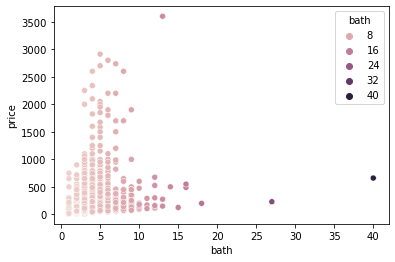

In [43]:
sns.scatterplot(data["bath"],data["price"],hue=data["bath"])

C:\Users\chohan\anaconda3\envs\usama_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='balcony', ylabel='price'>

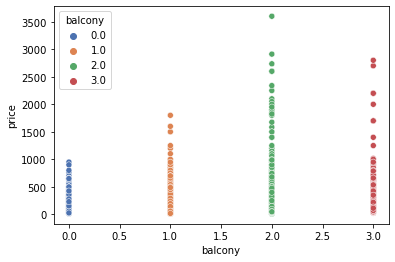

In [44]:
sns.scatterplot(data["balcony"],data["price"],hue=data["balcony"],palette="deep")

C:\Users\chohan\anaconda3\envs\usama_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='area_type', ylabel='price'>

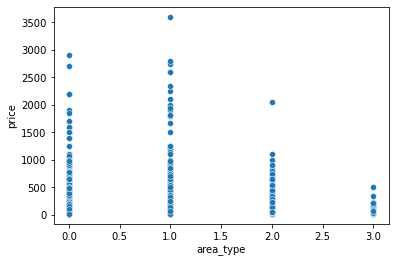

In [45]:
sns.scatterplot(data["area_type"],data["price"])

C:\Users\chohan\anaconda3\envs\usama_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='balcony', ylabel='count'>

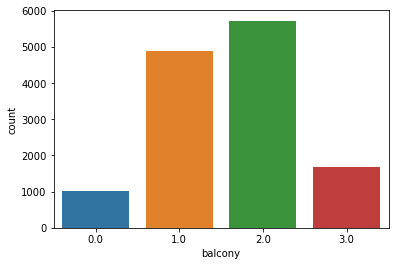

In [46]:
sns.countplot(data["balcony"])

C:\Users\chohan\anaconda3\envs\usama_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bath', ylabel='count'>

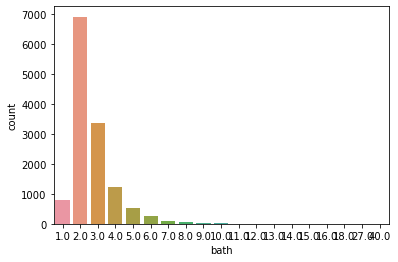

In [47]:
sns.countplot(data["bath"])

C:\Users\chohan\anaconda3\envs\usama_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='area_type', ylabel='count'>

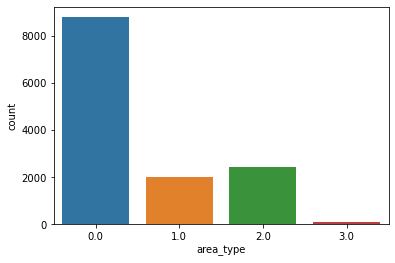

In [48]:
sns.countplot(data["area_type"])

In [49]:
X=data.iloc[:,0:4].values
Y=data.iloc[:,-1].values

In [50]:
X

array([[0.000e+00, 1.056e+03, 2.000e+00, 1.000e+00],
       [1.000e+00, 2.600e+03, 5.000e+00, 3.000e+00],
       [2.000e+00, 1.440e+03, 2.000e+00, 3.000e+00],
       ...,
       [2.000e+00, 1.141e+03, 2.000e+00, 1.000e+00],
       [0.000e+00, 4.689e+03, 4.000e+00, 1.000e+00],
       [0.000e+00, 5.500e+02, 1.000e+00, 1.000e+00]])

In [51]:
sc=StandardScaler()
x_labeled=sc.fit(X).transform(X)

In [52]:
x_labeled[0]

array([-0.66266011, -0.01691702, -0.51893593, -0.75137056])

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x_labeled,Y,test_size=0.2,random_state=True)
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

10656 10656
2664 2664
(10656, 4) (10656,)
(2664, 4) (2664,)


In [54]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
print(linear_model.intercept_)
print(linear_model.coef_)
predict=linear_model.predict(x_test[1:7])
print("Training_Accuracy:",linear_model.score(x_train,y_train)*100)
print("Testing_Accuracy:",linear_model.score(x_test,y_test)*100)
print("Model_Accuracy:",r2_score(Y,linear_model.predict(x_labeled))*100)

111.92698278770119
[ 5.60787589  1.47079063 62.41201869  5.62357673]
Training_Accuracy: 20.49303870847814
Testing_Accuracy: 22.052829643156624
Model_Accuracy: 20.878972391121952


In [55]:
random_forest_model=RandomForestRegressor(n_estimators=50)
random_forest_model.fit(x_train,y_train)
predict1=random_forest_model.predict(x_test[0:7])
print("Training_Accuracy:",random_forest_model.score(x_train,y_train)*100)
print("Testing_Accuracy:",random_forest_model.score(x_test,y_test)*100)
print("Model_Accuracy:",r2_score(Y,random_forest_model.predict(x_labeled))*100)

Training_Accuracy: 88.3950978172475
Testing_Accuracy: 53.40150058562821
Model_Accuracy: 79.7800664667986


In [56]:
decision_tree_model=DecisionTreeRegressor(criterion="mse")
decision_tree_model.fit(x_train,y_train)
predict2=decision_tree_model.predict(x_test[0:7])
print("Training_Accuracy:",decision_tree_model.score(x_train,y_train)*100)
print("Testing_Accuracy:",decision_tree_model.score(x_test,y_test)*100)
print("Model_Accuracy:",r2_score(Y,decision_tree_model.predict(x_labeled))*100)

Training_Accuracy: 93.33960092529438
Testing_Accuracy: 30.20152651454272
Model_Accuracy: 77.79537033322993


In [103]:
data=pd.read_csv("/Users/chohan/Desktop/ML_DL_ Hackathon/MachineHack Machine Learning Challenge Predicting House Prices In Bengaluru/Data/test.csv")

In [104]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [105]:
data.isnull().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

In [106]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [107]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [108]:
data.drop(columns=['availability', 'location', 'size', 'society',"price"],inplace=True)

In [109]:
bath_mean=data["bath"].mean().round()
balcony_mean=data["balcony"].mean().round()
# data["bath"]=data["bath"].replace(np.nan,mean_bath).astype(float)
data["bath"]=data["bath"].replace(np.nan,bath_mean)
data["balcony"]=data["balcony"].replace(np.nan,balcony_mean)
data["area_type"]=data["area_type"].replace(['Super built-up  Area', 'Plot  Area', 'Built-up  Area','Carpet  Area'],[0,1,2,3])
data["area_type"]=data["area_type"].astype(float)
data["bath"]=data["bath"].astype(float)
data["balcony"]=data["balcony"].astype(float)

In [110]:
data.isnull().sum()

area_type     0
total_sqft    0
bath          0
balcony       0
dtype: int64

In [111]:
total_sqftreplace()

1225
2400
1650
1322
1161
760
4500
960
1569
2400
1445
1505
3122
1096
1450
2884
604
1170
957
2900
1160
1725
450
1500
1824
2250
1698
1400
1200
190255
1150
1430
1215
3083
1025
1353
6369
1085
1200
1289
1200
2300
169170
1021
1750
1404
1060
1029
850
3565
2134
1703
1190
700
929
955
2400
1200
1843
1250
1893
1240
1151
1560
600
1050
1063
2465
900
1255
2091
1477
2145
1314
1860
1095
1225
1400
2400
1200
1050
1200
1050
1295
2000
1386
950
843
2439
1280
1010
793
1100
1050
40
1220
630
1444
1710
800
1745
870
1250
1393
1000
1371
2140
1450
1580
1368
1128
1171
1200
1500
1564
1345
1512
775
1200
1090
800
969
1095
1483
1252
3375
2400
3650
900
2440
1010
1680
2400
1990
1523
2439
4930
1200
1195
1050
550
540
1200
1294
1345
1100
1500
1560
780
1565
1790
120000
159498
1055
1060
845
1640
1350
2280
1250
1016
1230
1480
736
1200
1400
1500
1000
1717
1056
1200
1200
1130
1575
189798
1685
1000
1100
2400
1346
5294
2938
1908
1832
3150
1846
2000
920
700
1610
1200
3927
1222
900
181918
1200
1080
1170
1530
2025
1700
900
650
1207
1

0       1225.0
1       2400.0
2       1650.0
3       1322.0
4       1161.0
         ...  
1475    1246.0
1476    1660.0
1477    1216.0
1478     996.0
1479    1150.0
Name: total_sqft, Length: 1480, dtype: float64

In [112]:
data.dtypes

area_type     float64
total_sqft    float64
bath          float64
balcony       float64
dtype: object

In [113]:
x=data.iloc[:,0:4].values
x[0]

array([   0., 1225.,    2.,    2.])

In [114]:
y_hat=random_forest_model.predict(x)

In [115]:
y_hat

array([ 804.67333333, 1057.19666667, 1057.19666667, ...,  804.67333333,
        854.25      ,  795.69333333])

In [116]:
y_hat1=decision_tree_model.predict(x)

In [117]:
y_hat1

array([462., 462., 462., ..., 462., 462., 462.])

In [118]:
y_hat2=linear_model.predict(x)

In [119]:
y_hat2

array([2049.71669427, 4220.38769019, 2867.6466436 , ..., 2036.47957861,
       1718.49781526, 1950.62314887])